<a href="https://colab.research.google.com/github/TakuInada/umcuEpi_longterm_ieeg_respect_bids/blob/master/tensorpac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensorpec

In [7]:
!pip install tensorpac
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.spines.top': False, 'axes.spines.right': False})

import warnings
warnings.filterwarnings("ignore")

#import numpy as np
#import matplotlib.pyplot as plt
#plt.rcParams.update({'axes.spines.top': False, 'axes.spines.right': False})

from tensorpac import Pac
from tensorpac.utils import PSD
from tensorpac.signals import pac_signals_tort

In [9]:
# Dataset of signals artificially coupled between 10hz and 100hz :
n_epochs = 20    # number of trials
sf = 512.        # sampling frequency
T = 0.5          # one trials time (sec)
n_times = sf * T # number of time points

In [10]:
# Create artificially coupled signals using Tort method :
data, time = pac_signals_tort(f_pha=10, f_amp=100, noise=2, n_epochs=n_epochs,
                              dpha=10, damp=10, sf=sf, n_times=n_times)
print("data shape (n_epochs, n_times): ", data.shape)

data shape (n_epochs, n_times):  (20, 256)


Phase Amplitude Coupling object defined
INFO:tensorpac:Phase Amplitude Coupling object defined
    extract phases (n_pha=50) and amplitudes (n_amps=50)
INFO:tensorpac:    extract phases (n_pha=50) and amplitudes (n_amps=50)
    true PAC estimation using Gaussian Copula PAC (gcPac)
INFO:tensorpac:    true PAC estimation using Gaussian Copula PAC (gcPac)


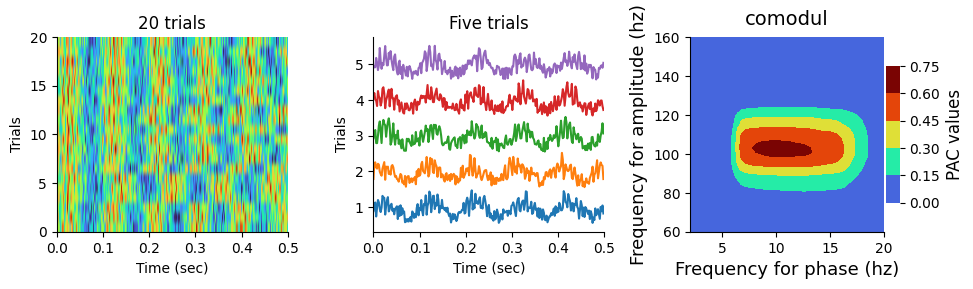

In [13]:
plt.figure(figsize=(10, 3))
plt.subplot(1,3,1)
plt.title(str(n_epochs)+" trials")
plt.imshow(data, cmap="turbo", extent=(0,T,0,n_epochs), aspect='auto')
plt.xlim(0, T); plt.xlabel("Time (sec)"); plt.ylabel("Trials")
plt.subplot(1,3,2)
plt.title("Five trials")
for i in range(5):
    plt.plot(time, data[i]*0.2+i+0.75)
plt.xlim(0, T); plt.xlabel("Time (sec)"); plt.ylabel("Trials")
plt.subplot(1,3,3)
# Define a Pac object
p = Pac(idpac=(6, 0, 0), f_pha='hres', f_amp='hres')
# Fileter the data and extract pac
xpac = p.filterfit(sf, data)
# Plot your PAC
p.comodulogram(xpac.mean(-1), cmap="turbo", plotas = 'contour', ncontours=5,
               title="comodul", fz_title=14, fz_labels=13)
plt.tight_layout()

Power Spectral Density estimation

Compute PSD over 20 trials and 256 time points
INFO:tensorpac:Compute PSD over 20 trials and 256 time points
    Add 95th confidence interval
INFO:tensorpac:    Add 95th confidence interval


TypeError: LogScale.__init__() got an unexpected keyword argument 'basex'

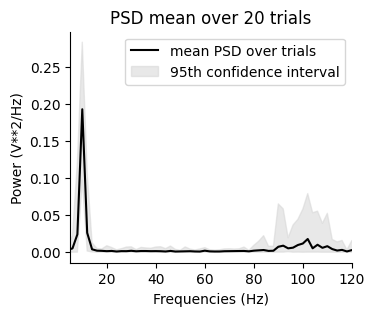

In [14]:
psd = PSD(data, sf)

plt.figure(figsize=(8, 3))
plt.subplot(1,2,1)
psd.plot(confidence=95, f_min=5, f_max=120, log=True, grid=True, fz_title=12, fz_labels=10)
plt.subplot(1,2,2)
psd.plot_st_psd(f_min=5, f_max=120, log=True, grid=True, fz_title=12, fz_labels=10, fz_cblabel=10)
plt.tight_layout()